# Flight Data Exploration
## by Blake Osborn

## Investigation Overview

> The data set I'm going to examine contains flight arrival and departure details from 2006 through 2008. I'm specifically going to focus on flights that originate from O'Hare International Airport because it's local to me and I'm curious to examine flight delays for the airport.

## Dataset Overview
> There are 521,194 records in the data set with 20 descriptive columns (21 after adding PeriodOfDay).  I've eliminated columns that concern flight arrival because I'm gong to focus on flight departures.

There are five columns that describe why flights were delayed 
- **CarrierDelay:** Caused by the air carrier
- **WeatherDelay:** Caused by inclement weather
- **NASDelay:** Caused by the NAS (National Airspace System)
- **SecurityDelay:** Caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas
- **LateAircraftDelay:** Caused by a delay in the arrival from an aircraft from another aiport

Note, the five columns were analyzed in the exploratory section of this project, but I didn't find the strong correlation I was looking for, so they are not in the explanatory portion of the project.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import flights details for 2006, 2007, and 2008
path = r'.\Flight_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))

# Import csv files
df_flights = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# Limit to flights originating at O'Hare
# This df is used to calc % of delays by carrier
df_flights = df_flights.query('Origin == "ORD"').copy()

# Set up df that contains data for delayed flights only
df_flights_delayed = df_flights.query('DepDelay > 0').copy()

# Remove unneeded columns
df_flights_delayed.drop(['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime'
                 , 'ArrDelay', 'TaxiIn', 'TaxiOut', 'Diverted'], axis=1, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Flight Delays

After plotting the log scale we still see a left skew, which makes sense. Most flight delays will probably be of a shorter duration and we would expect a fair amount with a moderate delay of a couple hours, with a few delays lasting several hours and longer.

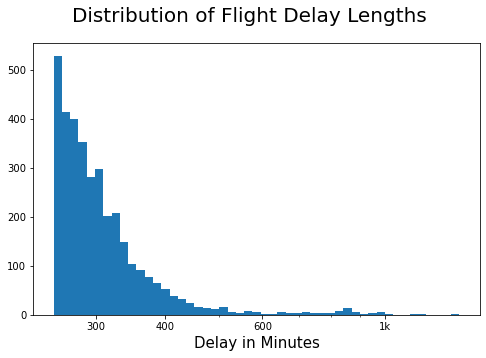

In [3]:
log_binsize = 0.015
bins = 10 ** np.arange(2.4, np.log10(df_flights_delayed['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_delayed, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([3e2, 4e2, 6e2, 1000], [300, '400', '600', '1k'])
plt.suptitle('Distribution of Flight Delay Lengths', fontsize=20)
plt.xlabel('Delay in Minutes', fontsize=15)
plt.show()

## Side-by-Side Carrier Delay Counts & Percent of Flights Delayed

> As expected, the five carriers with the most departures from O'Hare have highest number of delayed flights.  However, the carriers with the highest percent of delayed flights are the 3 carriers with the fewest flight departures from O'Hare - AS (Alaskan Airlines), EV (ExpressJet), and 9E (Endeavor Air)

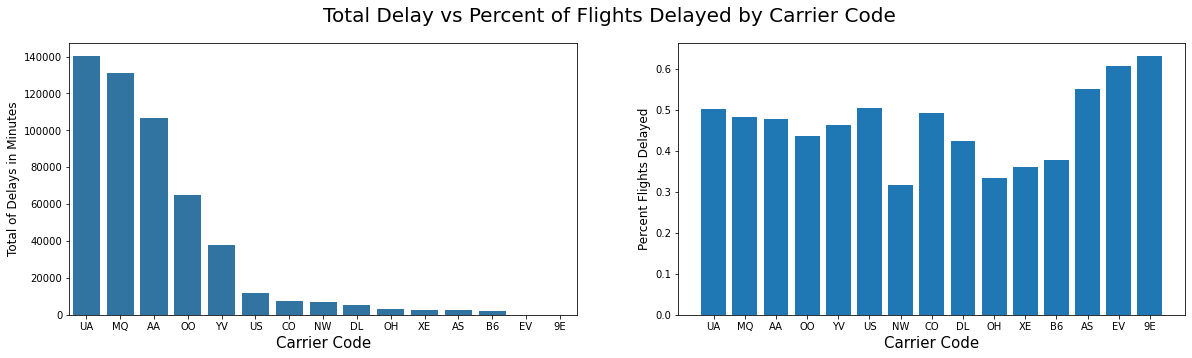

In [4]:
# Get total flight count by Carrier
df_ttl_flights = df_flights['UniqueCarrier'].value_counts().to_frame().reset_index()
# Udpate Column Names
df_ttl_flights.columns = ['UniqueCarrier', 'FlightCount']

# Get total delayed flight count by Carrier
df_ttl_delays = df_flights_delayed['UniqueCarrier'].value_counts().to_frame().reset_index()
# Udpate Column Names
df_ttl_delays.columns = ['UniqueCarrier', 'DelayCount']

# Merge total flight & total delayed flight count dataframes
df_delay_pct = pd.merge(df_ttl_flights, df_ttl_delays, on=['UniqueCarrier'])

# Calculate % of flights delayed by carrier
df_delay_pct['DelayPct'] = df_delay_pct['DelayCount'] / df_delay_pct['FlightCount']


#============================================
# Begin Charts
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: Total flights by Carrier
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]

carr_cnt = df_flights_delayed['UniqueCarrier'].value_counts()

# Get the indexes of the Series
carr_order = carr_cnt.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df_flights_delayed, x='UniqueCarrier', color=base_color, order=carr_order)
plt.xlabel('Carrier Code', fontsize=15)
plt.ylabel('Total of Delays in Minutes', fontsize=12)



# HISTOGRAM ON RIGHT: Percnt flights delayed by carrier
plt.subplot(1, 2, 2)

# Unique Carrier abbrev.
x = df_delay_pct['UniqueCarrier']

# Perct delayed flights by carrier
y = df_delay_pct['DelayPct']

plt.bar(x, y)

plt.suptitle('Total Delay vs Percent of Flights Delayed by Carrier Code', fontsize=20)
plt.xlabel('Carrier Code', fontsize=15)
plt.ylabel('Percent Flights Delayed', fontsize=12)

# Dsiplay the plot
plt.show();

## Box Plot of Delay Times by Carrier
The box plot shows that delays times across all carriers.  The median for all carriers is also quite low, showing that most delays are pretty short across all carriers.  This chart also plots the outliers or really long delays as well.  Here, we're able to identify most carrier's delays topped out around 600-800 minutes but several carriers had delays lasting longer than 1,000 minutes.

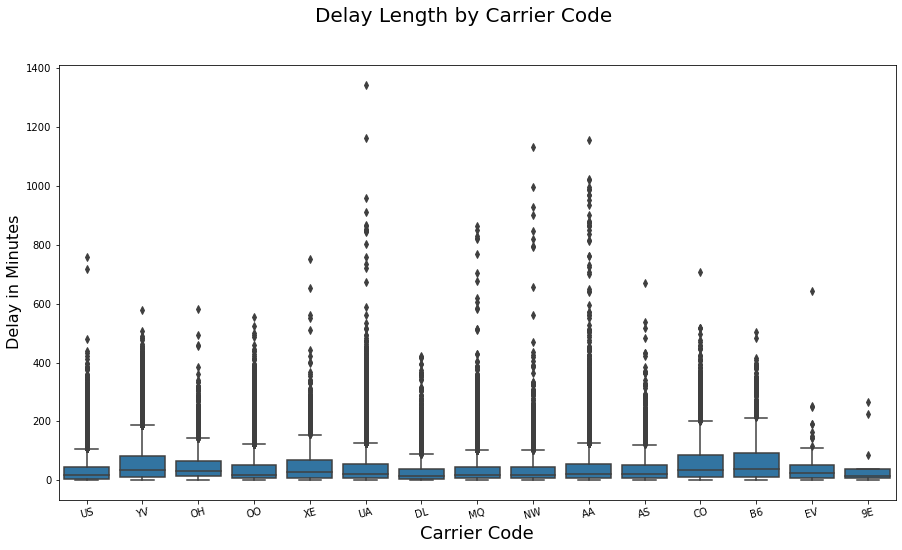

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])

sb.boxplot(data=df_flights_delayed, x='UniqueCarrier', y='DepDelay', color=base_color)
plt.xticks(rotation=15)
plt.suptitle('Delay Length by Carrier Code', fontsize=20)
plt.xlabel('Carrier Code', fontsize=18)
plt.ylabel('Delay in Minutes', fontsize=16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!